In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('sales_data (1).csv')
df.head()

,order_id,customer_id,product_id,category,product_name,quantity,price,discount_percent,order_date,payment_method,city
0,ORD0001,CUS0846,PROD0090,Home & Kitchen,Rice Cooker,1,15818,25.0,2023-12-22,Cash on Delivery,Coimbatore
1,ORD0002,CUS0421,PROD0193,Home & Kitchen,Non-stick Pan,3,31416,10.0,2023-12-11,Debit Card,Ooty
2,ORD0003,CUS0568,PROD0040,Home & Kitchen,Gas Stove,1,45967,5.0,2023-12-15,UPI,Mumbai
3,ORD0004,CUS0364,PROD0081,Electronics,Tablet,4,35137,15.0,2024-05-30,Cash on Delivery,Theni
4,ORD0005,CUS0928,PROD0178,Electronics,Smartphone,2,59209,10.0,2022-04-28,Debit Card,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          5000 non-null   object 
 1   customer_id       5000 non-null   object 
 2   product_id        5000 non-null   object 
 3   category          5000 non-null   object 
 4   product_name      5000 non-null   object 
 5   quantity          5000 non-null   int64  
 6   price             5000 non-null   int64  
 7   discount_percent  4385 non-null   float64
 8   order_date        5000 non-null   object 
 9   payment_method    5000 non-null   object 
 10  city              4557 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 429.8+ KB


In [4]:
df['discount_percent'].isnull().sum()

np.int64(615)

In [5]:
df['discount_percent']= df['discount_percent'].fillna(0)

In [6]:
df['discount_percent'].isnull().sum()

np.int64(0)

In [7]:
df['city'].isnull().sum()

np.int64(443)

In [8]:
df['city'] = df['city'].fillna('unknown')

In [9]:
df['city'].isnull().sum()

np.int64(0)

In [10]:
df["order_date"] = pd.to_datetime(df["order_date"])

In [11]:
print(df["order_date"].dtype)

datetime64[ns]


In [12]:
df["year"] = df["order_date"].dt.year
df["month"] = df["order_date"].dt.month
df["day"] = df["order_date"].dt.day
df["day_of_week"] = df["order_date"].dt.dayofweek

In [13]:
df[["order_date", "year", "month", "day", "day_of_week"]].head()

,order_date,year,month,day,day_of_week
0,2023-12-22,2023,12,22,4
1,2023-12-11,2023,12,11,0
2,2023-12-15,2023,12,15,4
3,2024-05-30,2024,5,30,3
4,2022-04-28,2022,4,28,3


In [14]:
df["is_weekend"] = df["day_of_week"].apply(lambda x: 1 if x >= 5 else 0)

In [15]:
df["sales"] = df["quantity"] * df["price"]

df[["quantity", "price", "sales"]].head()

,quantity,price,sales
0,1,15818,15818
1,3,31416,94248
2,1,45967,45967
3,4,35137,140548
4,2,59209,118418


In [16]:
df["sales"].describe()

count      5000.000000
mean      77472.942400
std       74020.298233
min           0.000000
25%       15601.250000
50%       55067.000000
75%      118593.000000
max      299230.000000
Name: sales, dtype: float64

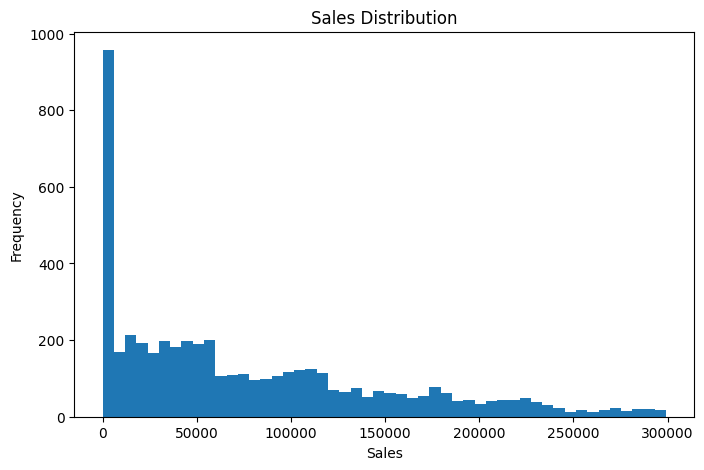

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df["sales"], bins=50)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

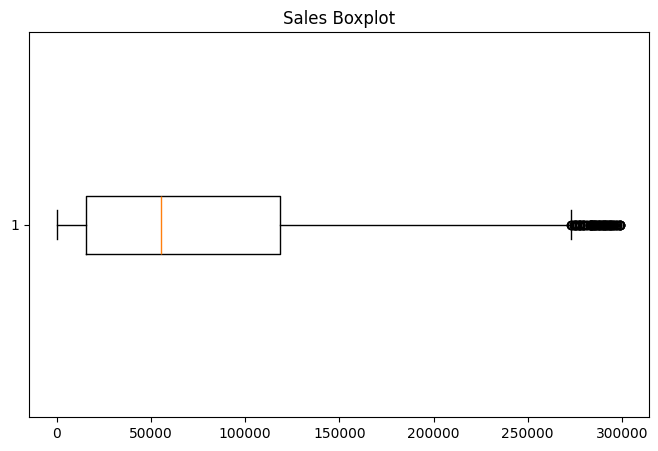

In [18]:
plt.figure(figsize=(8,5))
plt.boxplot(df["sales"], vert=False)
plt.title("Sales Boxplot")
plt.show()

In [19]:
df["sales"].skew()

np.float64(0.9619443134289207)

In [20]:
df["log_sales"] = np.log1p(df["sales"])

df["log_sales"].skew()

np.float64(-1.6230593600238838)

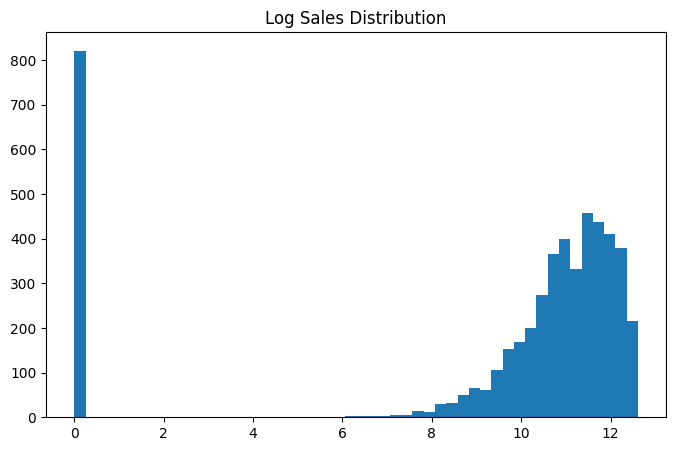

In [21]:
plt.figure(figsize=(8,5))
plt.hist(df["log_sales"], bins=50)
plt.title("Log Sales Distribution")
plt.show()

In [22]:
df.corr(numeric_only=True)

,quantity,price,discount_percent,year,month,day,day_of_week,is_weekend,sales,log_sales
quantity,1.000000,0.012894,-0.016126,0.018026,-0.006418,-0.029773,-0.006094,-0.009826,0.718254,0.728399
price,0.012894,1.000000,0.029855,-0.006036,-0.007033,0.023561,-0.022746,-0.014503,0.582061,0.172330
discount_percent,-0.016126,0.029855,1.000000,0.038916,0.002281,0.002238,0.023538,0.020426,-0.000793,0.004578
year,0.018026,-0.006036,0.038916,1.000000,0.003952,-0.016906,-0.003619,0.001974,0.009389,0.029231
month,-0.006418,-0.007033,0.002281,0.003952,1.000000,-0.013432,0.008880,-0.000014,-0.004461,-0.000562
day,-0.029773,0.023561,0.002238,-0.016906,-0.013432,1.000000,-0.028811,-0.015952,0.004252,-0.025666
day_of_week,-0.006094,-0.022746,0.023538,-0.003619,0.008880,-0.028811,1.000000,0.792262,-0.016504,-0.000746
is_weekend,-0.009826,-0.014503,0.020426,0.001974,-0.000014,-0.015952,0.792262,1.000000,-0.016746,0.002659
sales,0.718254,0.582061,-0.000793,0.009389,-0.004461,0.004252,-0.016504,-0.016746,1.000000,0.625744
log_sales,0.728399,0.172330,0.004578,0.029231,-0.000562,-0.025666,-0.000746,0.002659,0.625744,1.000000


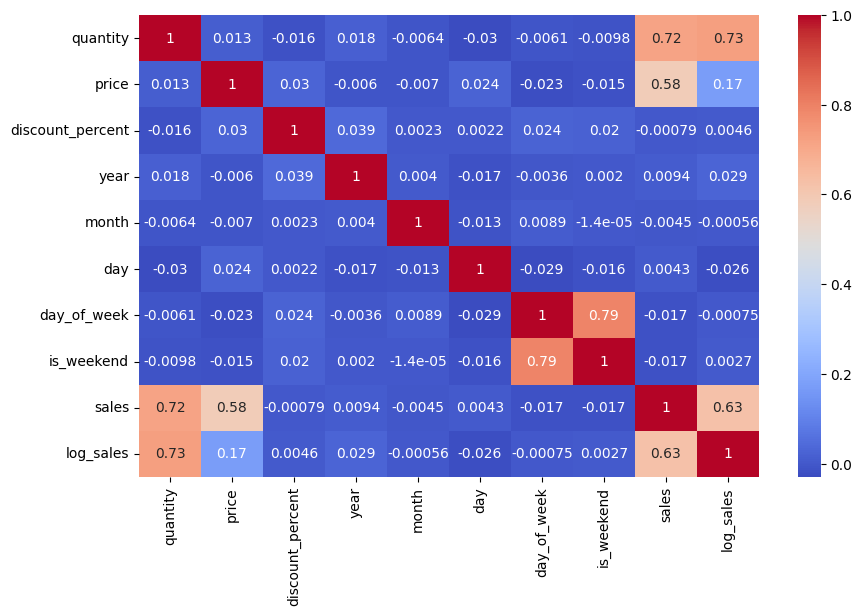

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

X = df[["quantity", "price"]]
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4000, 2)
X_test shape: (1000, 2)
y_train shape: (4000,)
y_test shape: (1000,)


In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: -74901.14191741655
Coefficients: [3.04873447e+04 2.46635998e+00]


In [26]:
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 22377.943262629175
RMSE: 29588.774893047932
R2 Score: 0.8494901348922346


In [28]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [29]:
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 84.25499000000009
RMSE: 150.55898251947633
R2 Score: 0.9999961030544188
